In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans

In [2]:
#df= pd.read_csv('/Users/kasunikaushalya/Desktop/AI Programming/CO2_Emission/Carbon-dioxide_ emission.csv')
file = '/Users/kasunikaushalya/Desktop/AI Programming/CO2_Emission/Carbon-dioxide_ emission.csv'
df = pd.read_csv(file, encoding= 'unicode_escape')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [4]:
print("Shape of the original dataset:")
df.shape

Shape of the original dataset:


(59620, 9)

In [5]:
print("Available columns:")
df.columns

Available columns:


Index(['Country', 'Code', 'Calling Code', 'Year', 'CO2 emission (Tons)',
       'Population(2022)', 'Area', '% of World', 'Density(km2)'],
      dtype='object')

In [6]:
df = df.rename(columns={'% of World': 'Precentage of World (%)'})

In [7]:
df.columns

Index(['Country', 'Code', 'Calling Code', 'Year', 'CO2 emission (Tons)',
       'Population(2022)', 'Area', 'Precentage of World (%)', 'Density(km2)'],
      dtype='object')

In [8]:
print("Overview of the first 5 rows:")
df.head()

Overview of the first 5 rows:


,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,Precentage of World (%),Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [9]:
print("Descriptive statistics of the columns:")
df.describe()

Descriptive statistics of the columns:


,Year,CO2 emission (Tons),Population(2022),Area
count,59620.000000,5.962000e+04,5.311600e+04,5.528400e+04
mean,1885.000000,1.034774e+09,3.992260e+07,6.522073e+05
std,78.231085,1.041652e+10,1.482365e+08,1.865483e+06
min,1750.000000,0.000000e+00,1.131200e+04,2.100000e+01
25%,1817.000000,0.000000e+00,1.770414e+06,1.770450e+04
50%,1885.000000,0.000000e+00,8.673095e+06,1.103815e+05
75%,1953.000000,8.715092e+06,2.862920e+07,4.925730e+05
max,2020.000000,4.170000e+11,1.425887e+09,1.709824e+07


In [10]:
print("Column data types:")
df.dtypes

Column data types:


Country                     object
Code                        object
Calling Code                object
Year                         int64
CO2 emission (Tons)        float64
Population(2022)           float64
Area                       float64
Precentage of World (%)     object
Density(km2)                object
dtype: object

In [11]:
print("Column data types:")
df.dtypes

Column data types:


Country                     object
Code                        object
Calling Code                object
Year                         int64
CO2 emission (Tons)        float64
Population(2022)           float64
Area                       float64
Precentage of World (%)     object
Density(km2)                object
dtype: object

In [12]:
df = df.replace(to_replace= r'km²', value= '', regex=True)
df = df.replace(to_replace= r'/', value= '', regex=True)
df["Density(km2)"] = [float(str(i).replace(",", "")) for i in df["Density(km2)"]]
df["Precentage of World (%)"] = [float(str(i).replace("%", "")) for i in df["Precentage of World (%)"]]


In [13]:
print("Column data types:")
df.dtypes

Column data types:


Country                     object
Code                        object
Calling Code                object
Year                         int64
CO2 emission (Tons)        float64
Population(2022)           float64
Area                       float64
Precentage of World (%)    float64
Density(km2)               float64
dtype: object

In [14]:
# Convert all columns to integer
#df = df.astype(int)

# Print the updated dataset
#print(df)
# df = df['Year'] = df['Year'].astype(da)
val = df['Density(km2)'] = df['Density(km2)'].astype(float)
df.dtypes

Country                     object
Code                        object
Calling Code                object
Year                         int64
CO2 emission (Tons)        float64
Population(2022)           float64
Area                       float64
Precentage of World (%)    float64
Density(km2)               float64
dtype: object

In [15]:
val1 = df['Precentage of World (%)'] = df['Precentage of World (%)'].astype(float)
df.dtypes

Country                     object
Code                        object
Calling Code                object
Year                         int64
CO2 emission (Tons)        float64
Population(2022)           float64
Area                       float64
Precentage of World (%)    float64
Density(km2)               float64
dtype: object

In [16]:
print(f"There are {df['Country'].nunique()} countries.")

There are 220 countries.


data Preprocessing

In [17]:
df.isnull().values.any()

True

In [18]:
df.isnull().sum()

Country                       0
Code                       2168
Calling Code               3523
Year                          0
CO2 emission (Tons)           0
Population(2022)           6504
Area                       4336
Precentage of World (%)    4336
Density(km2)               6504
dtype: int64

In [19]:

df[df.isnull()].count()

Country                    0
Code                       0
Calling Code               0
Year                       0
CO2 emission (Tons)        0
Population(2022)           0
Area                       0
Precentage of World (%)    0
Density(km2)               0
dtype: int64

In [20]:
df[df.duplicated()].count()


Country                    0
Code                       0
Calling Code               0
Year                       0
CO2 emission (Tons)        0
Population(2022)           0
Area                       0
Precentage of World (%)    0
Density(km2)               0
dtype: int64

columns 'Code' and 'Calling Code' are removed as they may not be relevant for the analysis.

In [21]:
df = df.drop(['Code', 'Calling Code'], axis=1)

In [22]:
df.columns

Index(['Country', 'Year', 'CO2 emission (Tons)', 'Population(2022)', 'Area',
       'Precentage of World (%)', 'Density(km2)'],
      dtype='object')

In [23]:
df.shape

(59620, 7)

In [24]:
#check duplicates
duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


In [25]:
df.columns


Index(['Country', 'Year', 'CO2 emission (Tons)', 'Population(2022)', 'Area',
       'Precentage of World (%)', 'Density(km2)'],
      dtype='object')

In [26]:
# Fill missing values with mean
data_filled =df.fillna(df.mean())

In [27]:
# Specify the column to fill null values
column_to_fill_Pop = 'Population(2022)'
column_to_fill_Area = 'Area'
column_to_fill_Word = 'Precentage of World (%)'
column_to_fill_Density = 'Density(km2)'

# Calculate the mean of the column
column_mean = df[column_to_fill_Pop].mean()
column_mean = df[column_to_fill_Area].mean()
column_mean = df[column_to_fill_Word].mean()
column_mean = df[column_to_fill_Density].mean()

# Fill null values in the specified column with the mean
df[column_to_fill_Pop].fillna(column_mean, inplace=True)
df[column_to_fill_Area].fillna(column_mean, inplace=True)
df[column_to_fill_Word].fillna(column_mean, inplace=True)
df[column_to_fill_Density].fillna(column_mean, inplace=True)

# Print the updated dataset
print(df)

           Country  Year  CO2 emission (Tons)  Population(2022)      Area  \
0      Afghanistan  1750                  0.0        41128771.0  652230.0   
1      Afghanistan  1751                  0.0        41128771.0  652230.0   
2      Afghanistan  1752                  0.0        41128771.0  652230.0   
3      Afghanistan  1753                  0.0        41128771.0  652230.0   
4      Afghanistan  1754                  0.0        41128771.0  652230.0   
...            ...   ...                  ...               ...       ...   
59615     Zimbabwe  2016          736467042.0        16320537.0  390757.0   
59616     Zimbabwe  2017          746048675.0        16320537.0  390757.0   
59617     Zimbabwe  2018          757903042.0        16320537.0  390757.0   
59618     Zimbabwe  2019          768852126.0        16320537.0  390757.0   
59619     Zimbabwe  2020          779383468.0        16320537.0  390757.0   

       Precentage of World (%)  Density(km2)  
0                          0

In [28]:
df.isnull().sum()

Country                    0
Year                       0
CO2 emission (Tons)        0
Population(2022)           0
Area                       0
Precentage of World (%)    0
Density(km2)               0
dtype: int64

In [29]:
df.isnull().values.any()

False

In [30]:
print("country with highest co2 emission")
df_emissions = df.sort_values(by='CO2 emission (Tons)', ascending=False)
df_emissions.head(15)

country with highest co2 emission


,Country,Year,CO2 emission (Tons),Population(2022),Area,Precentage of World (%),Density(km2)
57180,United States,2020,4.170000e+11,338289857.0,9372610.0,6.1,36.0
57179,United States,2019,4.120000e+11,338289857.0,9372610.0,6.1,36.0
57178,United States,2018,4.070000e+11,338289857.0,9372610.0,6.1,36.0
57177,United States,2017,4.010000e+11,338289857.0,9372610.0,6.1,36.0
57176,United States,2016,3.960000e+11,338289857.0,9372610.0,6.1,36.0
57175,United States,2015,3.910000e+11,338289857.0,9372610.0,6.1,36.0
57174,United States,2014,3.860000e+11,338289857.0,9372610.0,6.1,36.0
57173,United States,2013,3.800000e+11,338289857.0,9372610.0,6.1,36.0
57172,United States,2012,3.750000e+11,338289857.0,9372610.0,6.1,36.0
57171,United States,2011,3.690000e+11,338289857.0,9372610.0,6.1,36.0


In [31]:
print("country with highest co2 emission graphical view")
px.bar(x='Country', y='CO2 emission (Tons)', data_frame=df_emissions.head(15),
       title="Top 15 Countries with highest Co2 Emissions")

country with highest co2 emission graphical view


In [32]:
# Compute correlation coefficient
correlation = df['CO2 emission (Tons)'].corr(df['Density(km2)'])
print("Correlation coefficient:", correlation)

Correlation coefficient: -0.014487886153453401


In [33]:
# Group data by country and calculate the total CO2 emissions for each country
country_totals = df.groupby('Country')['CO2 emission (Tons)'].sum()

# Plot the contribution of each country
plt.figure(figsize=(30, 10))
country_totals.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (Tons)')
plt.title('Contribution of Countries to Global CO2 Emissions')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['Population(2022)', 'Area', 'Year']]
y = df['CO2 emission (Tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model (e.g., calculate R^2 score)
r2_score = model.score(X_test, y_test)
print("R^2 score:", r2_score)


R^2 score: 0.07293129242202767


In [ ]:
# Compute correlation coefficient or perform regression analysis
correlation = df['CO2 emission (Tons)'].corr(df['Area'])
print("Correlation coefficient:", correlation)

# Alternatively, perform regression analysis
X = df[['Area']]
y = df['CO2 emission (Tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model (e.g., calculate R^2 score)
r2_score = model.score(X_test, y_test)
print("R^2 score:", r2_score)


Correlation coefficient: 0.25915893160865555
R^2 score: 0.05324296524942196


       CO2 emission (Tons)  Population(2022)          Area  Density(km2)
count         5.962000e+04      5.962000e+04  5.962000e+04  59620.000000
mean          1.034774e+09      3.556743e+07  6.047922e+05    249.734694
std           1.041652e+10      1.404697e+08  1.804326e+06    751.710030
min           0.000000e+00      2.497347e+02  2.100000e+01      0.000000
25%           0.000000e+00      5.781832e+05  3.835750e+03     42.000000
50%           0.000000e+00      5.928975e+06  8.748050e+04    107.000000
75%           8.715092e+06      2.297867e+07  4.481238e+05    249.734694
max           4.170000e+11      1.425887e+09  1.709824e+07   8416.000000


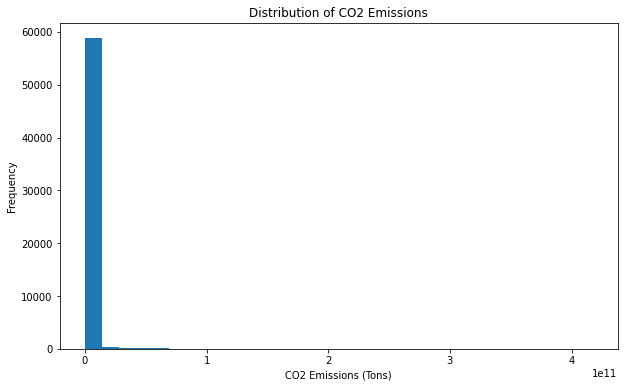

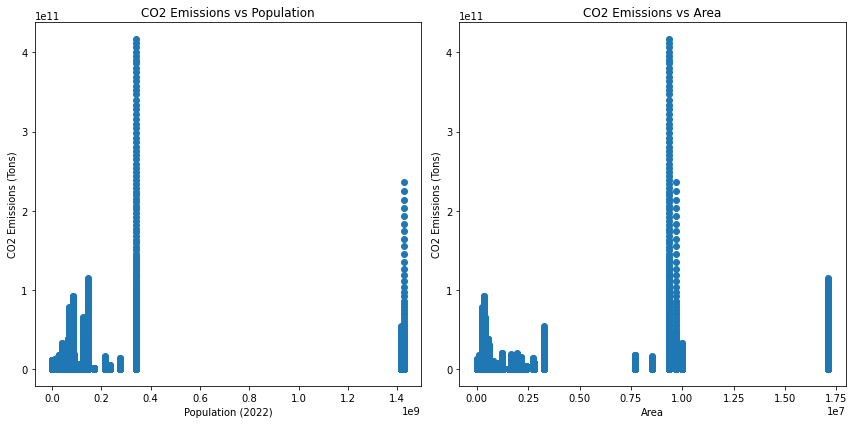

In [ ]:




# Perform descriptive statistics
statistics = df[['CO2 emission (Tons)', 'Population(2022)', 'Area', 'Density(km2)']].describe()
print(statistics)

# Create a histogram of CO2 emissions
plt.figure(figsize=(10, 6))
plt.hist(df['CO2 emission (Tons)'], bins=30)
plt.xlabel('CO2 Emissions (Tons)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emissions')
plt.show()

# Create scatter plots to explore relationships
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['Population(2022)'], df['CO2 emission (Tons)'])
plt.xlabel('Population (2022)')
plt.ylabel('CO2 Emissions (Tons)')
plt.title('CO2 Emissions vs Population')

plt.subplot(1, 2, 2)
plt.scatter(df['Area'], df['CO2 emission (Tons)'])
plt.xlabel('Area')
plt.ylabel('CO2 Emissions (Tons)')
plt.title('CO2 Emissions vs Area')

plt.tight_layout()
plt.show()


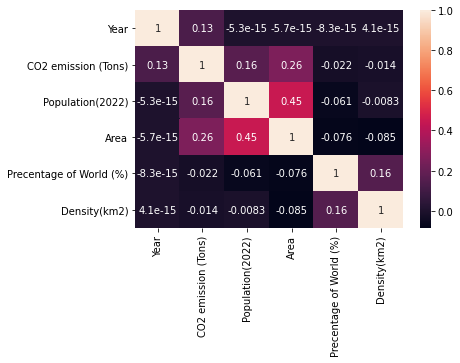

In [ ]:
# Correlation analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
# Regression analysis
X = df[['Population(2022)', 'Area', 'Density(km2)']]
y = df['CO2 emission (Tons)']

# Initialize and fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Print the coefficients
print('Coefficients:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)

Coefficients: [4.46005681e+00 1.34255391e+03 7.94949005e+04]
Intercept: 44322150.242290616


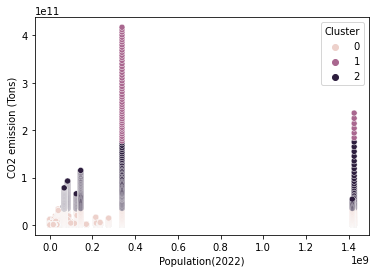

In [ ]:
# Clustering analysis
X_clustering = df[['CO2 emission (Tons)', 'Population(2022)', 'Area', 'Density(km2)']]

# Initialize and fit the K-means clustering model
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X_clustering)
# Add the cluster labels to the dataset
df['Cluster'] = kmeans_model.labels_

# Visualize the clusters
sns.scatterplot(data=df, x='Population(2022)', y='CO2 emission (Tons)', hue='Cluster')
plt.show()

In [ ]:
#Is there a correlation between a country's population and its CO2 emissions?
correlation = df['Population(2022)'].corr(df['CO2 emission (Tons)'])
print('Correlation between population and CO2 emissions:', correlation)



Correlation between population and CO2 emissions: 0.1648472403275814


In [ ]:
#What is the relationship between a country's area and its CO2 emissions?
correlation = df['Area'].corr(df['CO2 emission (Tons)'])
print('Correlation between area and CO2 emissions:', correlation)


Correlation between area and CO2 emissions: 0.25915893160865555


In [ ]:
#Is there a correlation between population density and CO2 emissions?
correlation = df['Density(km2)'].corr(df['CO2 emission (Tons)'])
print('Correlation between population density and CO2 emissions:', correlation)


Correlation between population density and CO2 emissions: -0.014487886153453401


In [ ]:
#How does the percentage of a country's CO2 emissions compare to its population size?
correlation = df['Precentage of World (%)'].corr(df['Population(2022)'])
print('Correlation between % of world CO2 emissions and population:', correlation)


Correlation between % of world CO2 emissions and population: -0.060623882617315494


In [ ]:
#Does the % of world CO2 emissions by a country correlate with its population or area?
correlation_population = df['Precentage of World (%)'].corr(df['Population(2022)'])
correlation_area = df['Precentage of World (%)'].corr(df['Area'])
print('Correlation between Precentage of World (%) CO2 emissions and population:', correlation_population)
print('Correlation between Precentage of World (%) CO2 emissions and area:', correlation_area)


Correlation between Precentage of World (%) CO2 emissions and population: -0.060623882617315494
Correlation between Precentage of World (%) CO2 emissions and area: -0.07606856401701695


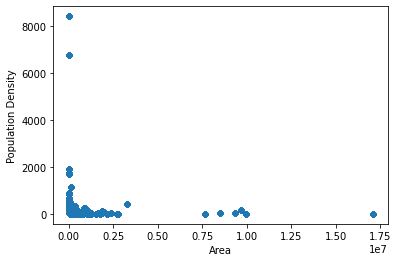

In [ ]:
#How does population density vary with respect to a country's area?
df.plot.scatter(x='Area', y='Density(km2)')
plt.xlabel('Area')
plt.ylabel('Population Density')
plt.show()

Descriptive Analysis

In [ ]:
# Calculate descriptive statistics
descriptive_stats = df.describe()

# Print the descriptive statistics
print(descriptive_stats)

               Year  CO2 emission (Tons)  Population(2022)          Area  \
count  59620.000000         5.962000e+04      5.962000e+04  5.962000e+04   
mean    1885.000000         1.034774e+09      3.556743e+07  6.047922e+05   
std       78.231085         1.041652e+10      1.404697e+08  1.804326e+06   
min     1750.000000         0.000000e+00      2.497347e+02  2.100000e+01   
25%     1817.000000         0.000000e+00      5.781832e+05  3.835750e+03   
50%     1885.000000         0.000000e+00      5.928975e+06  8.748050e+04   
75%     1953.000000         8.715092e+06      2.297867e+07  4.481238e+05   
max     2020.000000         4.170000e+11      1.425887e+09  1.709824e+07   

       Precentage of World (%)  Density(km2)       Cluster  
count             59620.000000  59620.000000  59620.000000  
mean                 18.547978    249.734694      0.011607  
std                  64.756121    751.710030      0.149021  
min                   0.000000      0.000000      0.000000  
25%       

               Year  CO2 emission (Tons)  Population(2022)          Area  \
count  59620.000000         5.962000e+04      5.962000e+04  5.962000e+04   
mean    1885.000000         1.034774e+09      3.556743e+07  6.047922e+05   
std       78.231085         1.041652e+10      1.404697e+08  1.804326e+06   
min     1750.000000         0.000000e+00      2.497347e+02  2.100000e+01   
25%     1817.000000         0.000000e+00      5.781832e+05  3.835750e+03   
50%     1885.000000         0.000000e+00      5.928975e+06  8.748050e+04   
75%     1953.000000         8.715092e+06      2.297867e+07  4.481238e+05   
max     2020.000000         4.170000e+11      1.425887e+09  1.709824e+07   

       Precentage of World (%)  Density(km2)       Cluster  
count             59620.000000  59620.000000  59620.000000  
mean                 18.547978    249.734694      0.011607  
std                  64.756121    751.710030      0.149021  
min                   0.000000      0.000000      0.000000  
25%       

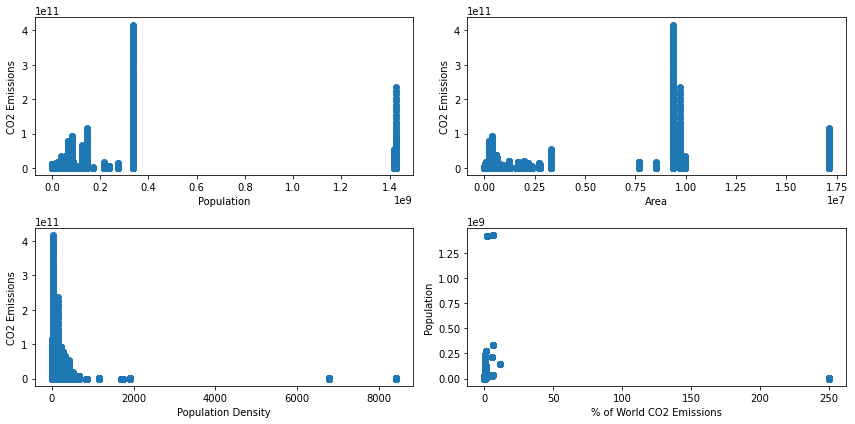

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate descriptive statistics
descriptive_stats = df.describe()

# Print the descriptive statistics
print(descriptive_stats)

# Visualize the data
plt.figure(figsize=(12, 6))

# Plotting population and CO2 emissions
plt.subplot(2, 2, 1)
plt.scatter(df['Population(2022)'], df['CO2 emission (Tons)'])
plt.xlabel('Population')
plt.ylabel('CO2 Emissions')

# Plotting area and CO2 emissions
plt.subplot(2, 2, 2)
plt.scatter(df['Area'], df['CO2 emission (Tons)'])
plt.xlabel('Area')
plt.ylabel('CO2 Emissions')

# Plotting population density and CO2 emissions
plt.subplot(2, 2, 3)
plt.scatter(df['Density(km2)'], df['CO2 emission (Tons)'])
plt.xlabel('Population Density')
plt.ylabel('CO2 Emissions')

# Plotting % of world CO2 emissions and population
plt.subplot(2, 2, 4)
plt.scatter(df['Precentage of World (%)'], df['Population(2022)'])
plt.xlabel('% of World CO2 Emissions')
plt.ylabel('Population')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


Section III Part-1

Research Question 1: Is there a correlation between CO2 emissions and population size?
Research Question 2: Does population density have an impact on CO2 emissions?
Research Question 3: Is there a correlation between a country's land area and its CO2 emissions?
Research Question 4: How does the percentage of global CO2 emissions contributed by a country relate to its population or land area?
Research Question 5: Is there a correlation between the year and CO2 emissions? Are CO2 emissions increasing or decreasing over time?

Research Question 1: Is there a correlation between CO2 emissions and population size?

Machine Learning Method: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['Population(2022)']]
y = df['CO2 emission (Tons)']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient and significance of population size
coefficient = model.coef_
significance = model.score(X, y)

print("Coefficient:", coefficient)
print("Significance:", significance)


Coefficient: [12.22422822]
Significance: 0.027174612643619755


Research Question 2: Does population density have an impact on CO2 emissions?

Machine Learning Method: Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Prepare the data
X = df[['Density(km2)']]
y = df['CO2 emission (Tons)']

# Create and fit the decision tree regression model
model = DecisionTreeRegressor()
model.fit(X, y)

# Get the feature importance
importance = model.feature_importances_

print("Feature Importance:", importance)


Feature Importance: [1.]


Research Question 3: Is there a correlation between a country's land area and its CO2 emissions?

Machine Learning Method: Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the data
X = df[['Area']]
y = df['CO2 emission (Tons)']

# Create and fit the random forest regression model
model = RandomForestRegressor()
model.fit(X, y)

# Get the feature importance
importance = model.feature_importances_

print("Feature Importance:", importance)


Feature Importance: [1.]


Research Question 4: How does the percentage of global CO2 emissions contributed by a country relate to its population or land area?

Machine Learning Method: Multivariate Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['Population(2022)', 'Area']]
y = df['Precentage of World (%)']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_

print("Coefficients:", coefficients)


Coefficients: [-1.52450075e-08 -2.19545813e-06]


Research Question 5: Is there a correlation between the year and CO2 emissions? Are CO2 emissions increasing or decreasing over time?

Machine Learning Method: Time Series Analysis

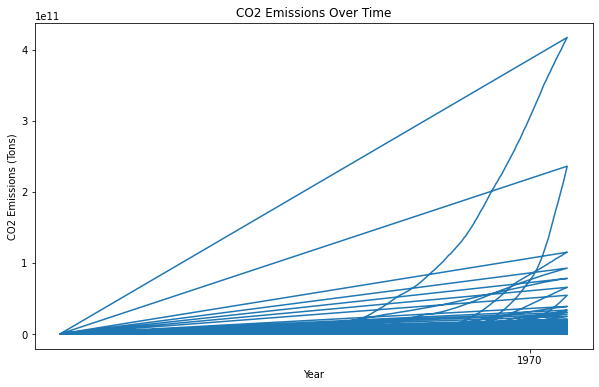

TypeError: 'int' object is not subscriptable

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Prepare the data
df['Year'] = pd.to_datetime(df['Year'])
df = df.set_index('Year')


# Plot the CO2 emissions over time
plt.figure(figsize=(10, 6))
plt.plot(df['CO2 emission (Tons)'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Tons)')
plt.title('CO2 Emissions Over Time')
plt.show()

# Perform ARIMA modeling for forecasting CO2 emissions
model = ARIMA(df['CO2 emission (Tons)'], order=(1))


Sectiion 2 - part 2
Perform general analysis (descriptive statistics)

In [ ]:
statistics = df.describe()
print(statistics)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Research Question 1: Is there a correlation between CO2 emissions and population size?
correlation_1 = df['CO2 emission (Tons)'].corr(df['Population(2022)'])
print("Correlation between CO2 emissions and population size:", correlation_1)

# Research Question 2: Does population density have an impact on CO2 emissions?
correlation_2 = df['CO2 emission (Tons)'].corr(df['Density(km2)'])
print("Correlation between CO2 emissions and population density:", correlation_2)

# Research Question 3: Is there a correlation between a country's land area and its CO2 emissions?
correlation_3 = df['CO2 emission (Tons)'].corr(df['Area'])
print("Correlation between CO2 emissions and land area:", correlation_3)

# Research Question 4: How does the percentage of global CO2 emissions contributed by a country relate to its population or land area?
correlation_4_population = df['% of World'].corr(df['Population(2022)'])
correlation_4_area = df['% of World'].corr(df['Area'])
print("Correlation between % of global CO2 emissions and population:", correlation_4_population)
print("Correlation between % of global CO2 emissions and land area:", correlation_4_area)

# Research Question 5: Is there a correlation between the year and CO2 emissions? Are CO2 emissions increasing or decreasing over time?
correlation_5 = df['Year'].corr(df['CO2 emission (Tons)'])
print("Correlation between year and CO2 emissions:", correlation_5)

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot for Research Question 1
plt.subplot(2, 2, 1)
plt.scatter(df['Population(2022)'], df['CO2 emission (Tons)'])
plt.xlabel('Population(2022)')
plt.ylabel('CO2 Emission (Tons)')
plt.title('Correlation: CO2 Emission vs Population')

# Scatter plot for Research Question 2
plt.subplot(2, 2, 2)
plt.scatter(df['Density(km2)'], df['CO2 emission (Tons)'])
plt.xlabel('Density(km2)')
plt.ylabel('CO2 Emission (Tons)')
plt.title('Correlation: CO2 Emission vs Population Density')

# Scatter plot for Research Question 3
plt.subplot(2, 2, 3)
plt.scatter(df['Area'], df['CO2 emission (Tons)'])
plt.xlabel('Area')
plt.ylabel('CO2 Emission (Tons)')
plt.title('Correlation: CO2 Emission vs Land Area')

# Line plot for Research Question 5
plt.subplot(2, 2, 4)
plt.plot(df['Year'], df['CO2 emission (Tons)'])
plt.xlabel('Year')
plt.ylabel('CO2 Emission (Tons)')
plt.title('CO2 Emissions Over Time')

plt.tight_layout()
plt.show()


Correlation between CO2 emissions and population size: 0.16484724032758144
Correlation between CO2 emissions and population density: -0.014487886153453401
Correlation between CO2 emissions and land area: 0.25915893160865555


KeyError: '% of World'

# Research Question 1: Is there a correlation between CO2 emissions and population size?

In [ ]:
# Research Question 1: Does the number of people in a country correlate with CO2    emissions?
correlation_1 = df['CO2 emission (Tons)'].corr(df['Population(2022)'])
print("Correlation between CO2 emissions and population size:", correlation_1)

Correlation between CO2 emissions and population size: 0.16484724032758144


Text(0.5, 1.0, 'Correlation: CO2 Emission vs Population')

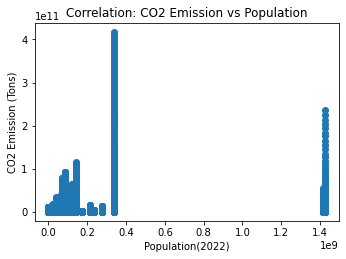

In [ ]:

# Scatter plot for Research Question 1
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(df['Population(2022)'], df['CO2 emission (Tons)'])
plt.xlabel('Population(2022)')
plt.ylabel('CO2 Emission (Tons)')
plt.title('Correlation: CO2 Emission vs Population')

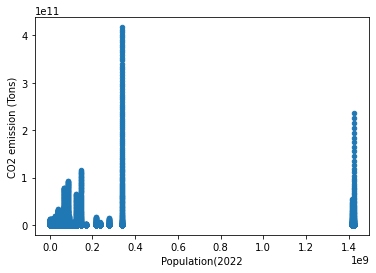

In [ ]:
df.plot.scatter(x='Population(2022)', y='CO2 emission (Tons)')
plt.xlabel('Population(2022')
plt.ylabel('CO2 emission (Tons)')
plt.show()

In [ ]:
df_emissions = df.sort_values(by='CO2 emission (Tons)', ascending=False)
df_emissions.head(15)

In [ ]:
# Plotting the bar chart
plt.bar(df['Population(2022)'], df['CO2 emission (Tons)'])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart')

# Displaying the bar chart
plt.show()

In [ ]:
#Do CO2 emissions depend on population density?
correlation_2 = df['CO2 emission (Tons)'].corr(df['Density(km2)'])
print("Correlation between CO2 emissions and population density:", correlation_2)

Correlation between CO2 emissions and population size: 0.16484724032758144


Text(0.5, 1.0, 'Correlation: CO2 Emission vs Population Density')

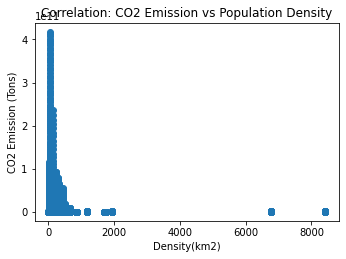

In [ ]:
# Scatter plot for Research Question 2

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
plt.scatter(df['Density(km2)'], df['CO2 emission (Tons)'])
plt.xlabel('Density(km2)')
plt.ylabel('CO2 Emission (Tons)')
plt.title('Correlation: CO2 Emission vs Population Density')

In [ ]:
# Research Question 3: Does the size of a nation's land area affect its CO2 emissions?
correlation_3 = df['CO2 emission (Tons)'].corr(df['Area'])
print("Correlation between CO2 emissions and land area:", correlation_3)

Correlation between CO2 emissions and land area: 0.25915893160865555


Text(0.5, 1.0, 'Correlation: CO2 Emission vs Land Area')

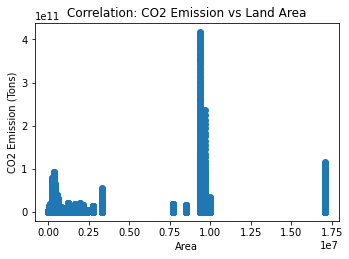

In [ ]:
# Scatter plot for Research Question 3
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
plt.scatter(df['Area'], df['CO2 emission (Tons)'])
plt.xlabel('Area')
plt.ylabel('CO2 Emission (Tons)')
plt.title('Correlation: CO2 Emission vs Land Area')

In [ ]:
# Research Question 4: How does a country's contribution to global CO2 emissions correspond to its population or land area?
correlation_4_population = df['Precentage of World (%)'].corr(df['Population(2022)'])
correlation_4_area = df['Precentage of World (%)'].corr(df['Area'])
print("Correlation between % of global CO2 emissions and population:", correlation_4_population)
print("Correlation between % of global CO2 emissions and land area:", correlation_4_area)

Correlation between % of global CO2 emissions and population: -0.060623882617315494
Correlation between % of global CO2 emissions and land area: -0.07606856401701695


In [ ]:
# Research Question 5: Is there a relationship between CO2 emissions and the year? Emissions of CO2 are they rising or falling over time?
df['Year'] = pd.to_datetime(df['Year'], format='%Y%m%d')
correlation_5 = df['Year'].corr(df['CO2 emission (Tons)'])
print("Correlation between year and CO2 emissions:", correlation_5)

In [ ]:
# Line plot for Research Question 5
plt.subplot(2, 2, 4)
plt.plot(df['Year'], df['CO2 emission (Tons)'])
plt.xlabel('Year')
plt.ylabel('CO2 Emission (Tons)')
plt.title('CO2 Emissions Over Time')

plt.tight_layout()
plt.show()

df_emissions = df.sort_values(by='CO2Emissions', ascending=False)
df_emissions.head(15)

Model Selection

In [ ]:
from sklearn.model_selection import train_test_split

# Select the independent variables and target variable
X = df[['Population(2022)', 'Density(km2)', 'Area']]
y = df['CO2 emission (Tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Create a Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)





Mean Squared Error: 1.238189153539302e+20
R-squared Score: 0.056323342990809544


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Create a RandomForestRegressor
model = RandomForestRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test).round()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 9.67937132608849e+19
R-squared Score: 0.26229391132654056


In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# # Assuming you have trained your classification model and obtained predictions on the test data
# y_pred = model.predict(X_test)  # Replace 'model' with your trained model and 'X_test' with your test data

# Assuming you have the true labels for the test data
# Replace 'y_true' with the true labels corresponding to the test data
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


model =LinearRegression()
# Train the model on the training data

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6201777926870178


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier
model = KNeighborsClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 1.3201915959664101e+20
R-squared Score: -0.006174208788742197


Model Evaluation

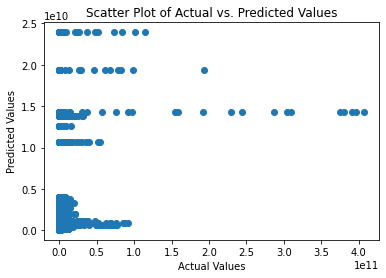

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score


# Create a RandomForestRegressor
model = RandomForestRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = model.predict(X_test)[:, 2]  # Predicted probabilities of positive class

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr= roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line representing the random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)

In [ ]:
# Assuming you have already trained your classification model and obtained predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities of positive class

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr= roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line representing the random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: multiclass format is not supported

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report


# Create a RandomForestRegressor
model = RandomForestRegressor()

# Train the model on the training data
RandomForest_model = model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print(report)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
from sklearn.metrics import classification_report

#y_pred = RandomForest_model .predict(X_test)  # Replace 'model' with your trained model and 'X_test' with your test data

# Assuming you have the true labels for the test data
# Replace 'y_true' with the true labels corresponding to the test data
report = classification_report(y_test, y_pred)

print(report)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets